In [1]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *

In [2]:
def label_func(fname):
    if fname.name[0].startswith('B'):
         return 'braided'
    elif fname.name[0].startswith('S'): 
        return 'single'
    elif fname.name[0].startswith('W'): 
        return 'wandering'

In [3]:
path = Path('RiverImages')

fnames = get_image_files(path, folders=['Braided', 'Single', 'Wandering'])

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

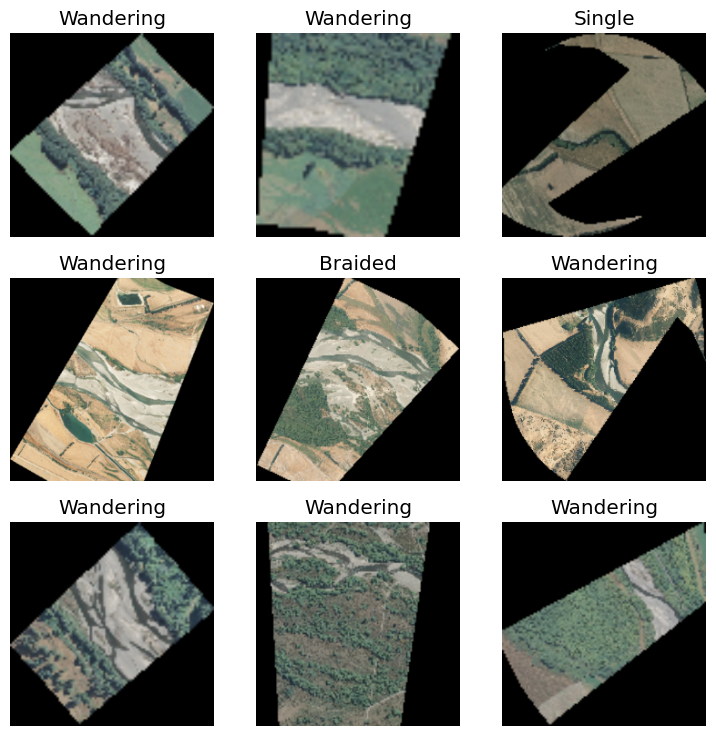

In [20]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = parent_label,
                   splitter = RandomSplitter(),
                   item_tfms = Resize(224))
dsets = dblock.datasets(path)
dls = dblock.dataloaders(path)
dls.show_batch()

In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: 

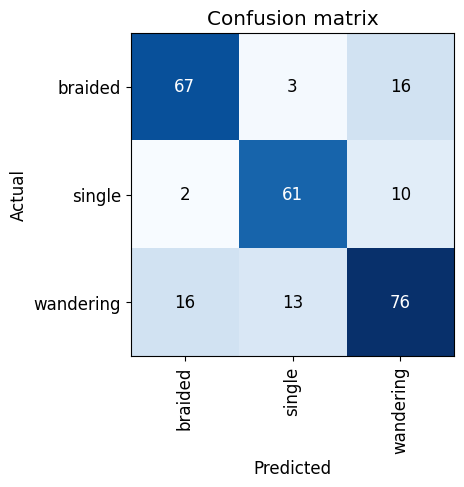

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

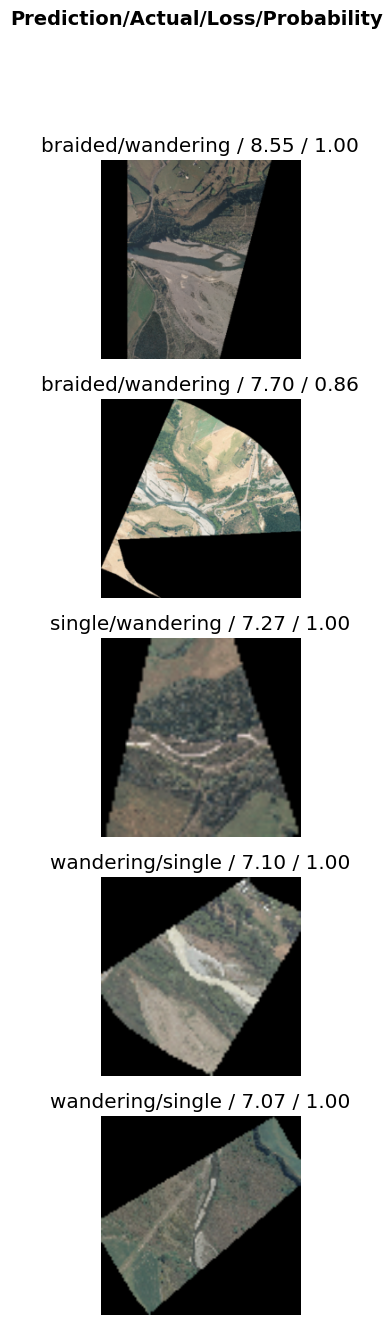

In [8]:
interp.plot_top_losses(5, nrows=5)

In [12]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [10]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [11]:
learn.export()

In [13]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [14]:
learn = load_learner('export.pkl')

categories = ('Braided', 'Single', 'Wandering')

In [15]:
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [16]:
import gradio as gr

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [19]:
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
